In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('Google_train_data.csv')
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values
trainData

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
print(trainData.shape)
trainData

(1149, 1)


array([[0.40001392],
       [0.40665027],
       [0.38520976],
       ...,
       [0.68184982],
       [0.67660572],
       [0.65115092]])

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): 
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)
X_train

(1089, 60, 1)


array([[[0.40001392],
        [0.40665027],
        [0.38520976],
        ...,
        [0.36279469],
        [0.35745777],
        [0.37766846]],

       [[0.40665027],
        [0.38520976],
        [0.36439577],
        ...,
        [0.35745777],
        [0.37766846],
        [0.36065992]],

       [[0.38520976],
        [0.36439577],
        [0.30063115],
        ...,
        [0.37766846],
        [0.36065992],
        [0.34406906]],

       ...,

       [[0.65286802],
        [0.66184797],
        [0.66194078],
        ...,
        [0.69625951],
        [0.69312697],
        [0.69693243]],

       [[0.66184797],
        [0.66194078],
        [0.66284574],
        ...,
        [0.69312697],
        [0.69693243],
        [0.68184982]],

       [[0.66194078],
        [0.66284574],
        [0.65871543],
        ...,
        [0.69693243],
        [0.68184982],
        [0.67660572]]])

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 14s - loss: 0.0305
Epoch 2/20
35/35 - 7s - loss: 0.0117
Epoch 3/20
35/35 - 7s - loss: 0.0085
Epoch 4/20
35/35 - 7s - loss: 0.0072
Epoch 5/20
35/35 - 7s - loss: 0.0072
Epoch 6/20
35/35 - 7s - loss: 0.0066
Epoch 7/20
35/35 - 7s - loss: 0.0073
Epoch 8/20
35/35 - 7s - loss: 0.0076
Epoch 9/20
35/35 - 7s - loss: 0.0068
Epoch 10/20
35/35 - 7s - loss: 0.0061
Epoch 11/20
35/35 - 7s - loss: 0.0068
Epoch 12/20
35/35 - 7s - loss: 0.0053
Epoch 13/20
35/35 - 7s - loss: 0.0052
Epoch 14/20
35/35 - 7s - loss: 0.0059
Epoch 15/20
35/35 - 7s - loss: 0.0053
Epoch 16/20
35/35 - 7s - loss: 0.0045
Epoch 17/20
35/35 - 7s - loss: 0.0053
Epoch 18/20
35/35 - 7s - loss: 0.0045
Epoch 19/20
35/35 - 7s - loss: 0.0048
Epoch 20/20
35/35 - 7s - loss: 0.0048


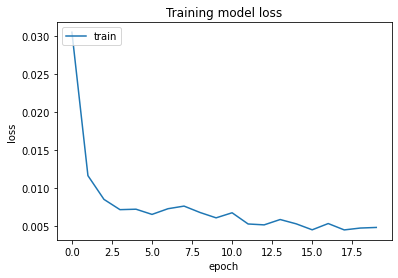

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.1977971],
       [1.2000504],
       [1.2121533],
       [1.2299892],
       [1.2429272],
       [1.2399147],
       [1.2232254],
       [1.203113 ],
       [1.1923349],
       [1.1917623],
       [1.186342 ],
       [1.1752939],
       [1.1655961],
       [1.1568071],
       [1.156208 ],
       [1.1623653],
       [1.1828079],
       [1.2130487],
       [1.2456294],
       [1.2762413],
       [1.2844568],
       [1.2759125],
       [1.2507257],
       [1.2189138],
       [1.1932644],
       [1.1818107],
       [1.1827016],
       [1.185274 ],
       [1.1784017],
       [1.1667395],
       [1.1540618],
       [1.1400629],
       [1.1190159],
       [1.0935588],
       [1.0860947],
       [1.1003356],
       [1.1262338],
       [1.1526562],
       [1.1754667],
       [1.1842139],
       [1.1939819],
       [1.2076769],
       [1.2245464],
       [1.2400548],
       [1.2496293],
       [1.248813 ],
       [1.2364198],
       [1.2268317],
       [1.2256267],
       [1.2336334],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

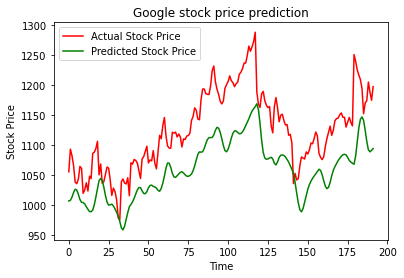

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()